In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
from sympy import Symbol, series, exp, sin
from sympy.plotting import plot
from sympy import lambdify
from pylab import cm

In [3]:
x = Symbol('x')
# Calcula Taylor expansions on interest points\n",
convex_term = exp(x*x)
# Calculate Taylor series expansions (second order) \n",
# over a grid of points of interest\n",
expansion1 = series(convex_term, x0=0.1, n=1).removeO()
expansion2 = series(convex_term, x0=0.1, n=2).removeO()
expansion3 = series(convex_term, x0=0.1, n=3).removeO()
expansion4 = series(convex_term, x0=0.1, n=5).removeO()

print(expansion1)
print(expansion2)
print(expansion3)
print(expansion4)

lambded_expansion1 = lambdify(x, expansion1, modules=['numpy'])
lambded_expansion2 = lambdify(x, expansion2, modules=['numpy'])
lambded_expansion3 = lambdify(x, expansion3, modules=['numpy'])
lambded_expansion4 = lambdify(x, expansion4, modules=['numpy'])

1.01005016708417
0.202010033416834*x + 0.989849163742485
0.202010033416834*x + 1.03025117042585*(x - 0.1)**2 + 0.989849163742485
0.202010033416834*x + 0.525293423561573*(x - 0.1)**4 + 0.203356766972946*(x - 0.1)**3 + 1.03025117042585*(x - 0.1)**2 + 0.989849163742485


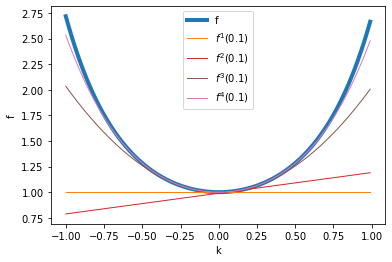

In [4]:
colors = cm.get_cmap('tab10', 7)

k = np.arange(-1.0, 1.0, 0.01)
y = np.exp(k*k)

fig, ax = plt.subplots()
ax.plot(k, y, linewidth=4, color=colors(0), label="f")
ax.plot(k, k/k, linewidth=1, color=colors(1), label="$f^1(0.1)$")
ax.plot(k, lambded_expansion2(k), linewidth=1, color=colors(2), label="$f^2(0.1)$")
ax.plot(k, lambded_expansion3(k), linewidth=1, color=colors(3), label="$f^3(0.1)$")
ax.plot(k, lambded_expansion4(k), linewidth=1, color=colors(4), label="$f^4(0.1)$")
ax.set(xlabel='k', ylabel='f')
plt.legend()
plt.show()
#fig.savefig("test.png")
plt.show()

In [5]:
print(np.mean(np.power(y-lambded_expansion2(k),2)))
print(np.mean(np.power(y-lambded_expansion4(k),2)))

0.465897619011589
0.0024815011490313317


In [6]:
x = Symbol('x')
# Calcula Taylor expansions on interest points\n",
convex_term = exp(x*x)
# Calculate Taylor series expansions (second order) \n",
# over a grid of points of interest\n",
expansion1 = series(convex_term, x0=-1.0, n=2).removeO()
expansion2 = series(convex_term, x0=-0.5, n=2).removeO()
expansion3 = series(convex_term, x0=0.5, n=2).removeO()
expansion4 = series(convex_term, x0=1.0, n=2).removeO()

print(expansion1)
print(expansion2)
print(expansion3)
print(expansion4)

lambded_expansion1 = lambdify(x, expansion1, modules=['numpy'])
lambded_expansion2 = lambdify(x, expansion2, modules=['numpy'])
lambded_expansion3 = lambdify(x, expansion3, modules=['numpy'])
lambded_expansion4 = lambdify(x, expansion4, modules=['numpy'])

-5.43656365691809*x - 2.71828182845905
0.642012708343871 - 1.28402541668774*x
1.28402541668774*x + 0.642012708343871
5.43656365691809*x - 2.71828182845905


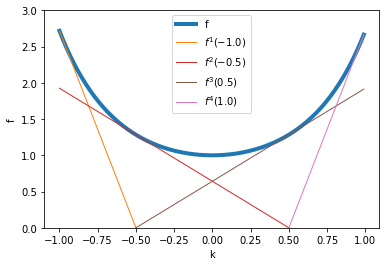

In [7]:
colors = cm.get_cmap('tab10', 7)

k = np.arange(-1.0, 1.0, 0.01)
y = np.exp(k*k)

fig, ax = plt.subplots()
ax.plot(k, y, linewidth=4, color=colors(0), label="f")
ax.plot(k, lambded_expansion1(k), linewidth=1, color=colors(1), label="$f^1(-1.0)$")
ax.plot(k, lambded_expansion2(k), linewidth=1, color=colors(2), label="$f^2(-0.5)$")
ax.plot(k, lambded_expansion3(k), linewidth=1, color=colors(3), label="$f^3(0.5)$")
ax.plot(k, lambded_expansion4(k), linewidth=1, color=colors(4), label="$f^4(1.0)$")
ax.set(xlabel='k', ylabel='f')
plt.legend()
plt.ylim(0, 3)
#plt.ylim(0, 100)
#fig.savefig("test.png")
plt.show()

In [8]:
x = Symbol('x')
# Calcula Taylor expansions on interest points\n",
convex_term = exp(x*x)
# Calculate Taylor series expansions (second order) \n",
# over a grid of points of interest\n",
expansions = []
ids = []
expansions_lambd = []
for e in np.linspace(-1,1,10):
    ids.append("f^1({%.3f})" % e)
    expansions.append(series(convex_term, x0=e, n=2).removeO())
    expansions_lambd.append(lambdify(x, expansions[-1], modules=['numpy']))

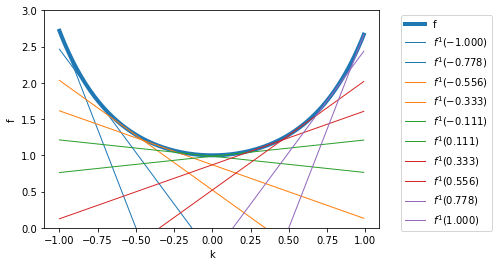

In [9]:
colors = cm.get_cmap('tab10', 20)

k = np.arange(-1.0, 1.0, 0.01)
y = np.exp(k*k)

fig, ax = plt.subplots()
ax.plot(k, y, linewidth=4, color=colors(0), label="f")
for id, exp_lamb in enumerate(expansions_lambd):
    ax.plot(k, exp_lamb(k), linewidth=1, color=colors(id), label="$%s$" % ids[id])
ax.set(xlabel='k', ylabel='f')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0, 3)
#plt.ylim(0, 100)
#fig.savefig("test.png")
plt.show()

In [10]:
from sympy.calculus.util import is_convex, Interval
x = Symbol('x')
# Calcula Taylor expansions on interest points\n",
convex_term = x*x * sin(x)


# Calculate Taylor series expansions (second order) \n",
# over a grid of points of interest\n",
expansions = []
ids = []
expansions_lambd = []
for e in np.linspace(-1,1,10):
    ids.append("f^1({%.3f})" % e)
    expansions.append(series(convex_term, x0=e, n=2).removeO())
    expansions_lambd.append(lambdify(x, expansions[-1], modules=['numpy']))

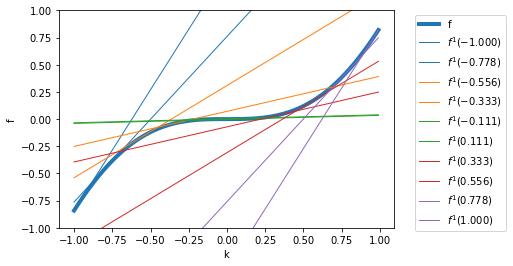

In [11]:
colors = cm.get_cmap('tab10', 20)

k = np.arange(-1.0, 1.0, 0.01)
y = np.power(k,2) * np.sin(k)

fig, ax = plt.subplots()
ax.plot(k, y, linewidth=4, color=colors(0), label="f")
for id, exp_lamb in enumerate(expansions_lambd):
    ax.plot(k, exp_lamb(k), linewidth=1, color=colors(id), label="$%s$" % ids[id])
ax.set(xlabel='k', ylabel='f')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(-1, 1)
#plt.ylim(0, 100)
#fig.savefig("test.png")
plt.show()

In [359]:
from sympy.calculus.util import is_convex, Interval
from itertools import combinations

x = Symbol('x')
y = Symbol('y')
# Calcula Taylor expansions on interest points\n",
jain_term = ((x+y)*(x+y))/((x*x+y*y)*2)
jain_term_lambded = lambdify((x, y), jain_term, modules=['numpy'])

# Calculate Taylor series expansions (second order) \n",
# over a grid of points of interest\n",

expansions_x = []
expansions_y = []
ids = []
expansions_lambd_x = []
expansions_lambd_y = []

pois = list(combinations(np.linspace(0.0,1.0,4), 2))

for e in pois:
    print(e)
    ids.append("f^1({%.3f})" % e[0])
    try:
        expansions_x.append(jain_term.series(x, x0=e[0], n=2).removeO().series(y, x0=e[1], n=1).removeO())
        expansions_lambd_x.append(lambdify((x, y), expansions_x[-1], modules=['numpy']))
        
        expansions_y.append(jain_term.series(y, x0=e[0], n=2).removeO().series(x, x0=e[1], n=1).removeO())
        expansions_lambd_y.append(lambdify((x, y), expansions_y[-1], modules=['numpy']))
    except:
        print("Error! poi (%s, %s) not computed" % (e[0], e[1]))
        pass

(0.0, 0.3333333333333333)
(0.0, 0.6666666666666666)
(0.0, 1.0)
(0.3333333333333333, 0.6666666666666666)
Error! poi (0.3333333333333333, 0.6666666666666666) not computed
(0.3333333333333333, 1.0)
(0.6666666666666666, 1.0)


(y + 0.5)**2/(2*y**2 + 0.5)
0.590000000000000


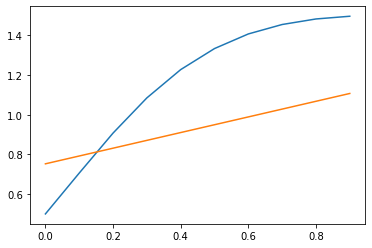

In [360]:
print(jain_term.series((x), x0=0.5, n=1).removeO())
k = np.arange(0.0, 1.0, 0.1)
t = np.power((k+0.5), 2)/(1*np.power(k,2)+0.5)
plt.plot(k, t)

z = Symbol('z')
one_var = (z + 0.5)**2/(2*z**2 + 0.5)

print(z.series(z, x0=0.59, n=1).removeO())

td = 0.393889660396415*k + 0.752493372048984
plt.plot(k, td)

In [361]:
print(set(expansions_x))
print(set(expansions_y))

{3.0*x + 1/2, 1.0*x + 1/2, 0.266272189349113*x + 0.784023668639053, 0.72*x + 0.56, 1.5*x + 1/2}
{3.0*y + 1/2, 0.266272189349113*y + 0.784023668639053, 1.0*y + 1/2, 0.72*y + 0.56, 1.5*y + 1/2}


In [362]:
print(expansions_x[0])
print(expansions_y[0])
print(expansions_x[0]-expansions_y[0])

3.0*x + 1/2
3.0*y + 1/2
3.0*x - 3.0*y


0 = (0.0, 0.2)
1 = (0.0, 0.4)
2 = (0.0, 0.6000000000000001)
3 = (0.0, 0.8)
4 = (0.0, 1.0)
5 = (0.2, 0.4)
6 = (0.2, 0.6000000000000001)
7 = (0.2, 0.8)
8 = (0.2, 1.0)
9 = (0.4, 0.6000000000000001)
10 = (0.4, 0.8)
11 = (0.4, 1.0)
12 = (0.6000000000000001, 0.8)
13 = (0.6000000000000001, 1.0)
14 = (0.8, 1.0)


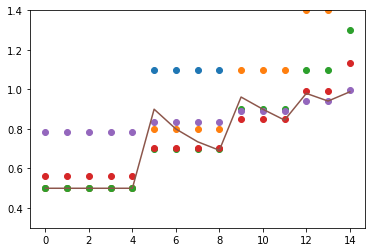

In [363]:
x_values = np.linspace(0,1,20)
outputs = [] 

pois = list(combinations(np.linspace(0.0,1.0, 6), 2))
for pair in pois:
    l = []
    x_value = pair[0]
    y_value = pair[1]
    count = 0
    for ex,ey in zip(expansions_lambd_x, expansions_lambd_y):
        if count in  [0,1,2,3,4,5,6,7,8,9]:
            l.append(ex(x_value, y_value))
        count += 1
    outputs.append(tuple(i for i in l))
plt.plot(outputs, 'o')
plt.ylim(0.3, 1.4)


outputs = [] 
l = []
inds = []
count = 0
for pair in pois:
    print("%s = %s" % (count, pair))
    x_value = pair[0]
    y_value = pair[1]
    outputs.append(jain_term_lambded(x_value, y_value))
    inds.append(count)
    count += 1
plt.plot(inds, outputs, "-")

In [337]:
print(expansions_lambd_x[6](0.3, 0.6))
print(jain_term_lambded(0.3, 0.6))

print(expansions_x[6])

0.92
0.8999999999999999
1.2*x + 0.56


In [343]:
import plotly.graph_objects as go

x = y = np.arange(0.0,1.0,0.1)
X, Y = np.meshgrid(x, y)
Z = jain_term_lambded(X, Y)
Z1 = expansions_lambd_x[0](X, Y)

#fig = go.Figure(data=[dict(z=Z, type='surface'), dict(z=Z1, type='surface')])
fig = go.Figure(data=[dict(z=Z, type='surface')])
fig.show()

<string>:2: RuntimeWarning:

invalid value encountered in true_divide

